<a href="https://colab.research.google.com/github/huseyin-yigit-ulker/Traffic-Sign-Detector/blob/main/Data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True) 
import pandas as pd
import os

Mounted at /content/gdrive/


#Helper Functions

In [22]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [23]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Get a random image path
  random_image = random.sample(os.listdir(target_dir), 1)
  print(random_image)
""" # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img"""
     

' # Read in the image and plot it using matplotlib\n  img = mpimg.imread(target_folder + "/" + random_image[0])\n  plt.imshow(img)\n  plt.title(target_class)\n  plt.axis("off");\n\n  print(f"Image shape: {img.shape}") # show the shape of the image\n\n  return img'

# Codes

In [24]:
ground_truth_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data/gt.txt"

In [25]:
#reading data guides 
data = pd.read_csv(ground_truth_path,sep=';',names=['path','left','top','right','bottom','id'])

In [26]:
data

,path,left,top,right,bottom,id
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39
...,...,...,...,...,...,...
847,00570.ppm,881,416,914,449,9
848,00571.ppm,1287,361,1308,384,17
849,00575.ppm,403,474,435,506,38
850,00593.ppm,584,510,608,534,38



The ground truth file (gt.txt) includes the name of the image file, the bounding box coordinates that specify the position of traffic signs in the image (including the left, top, right, and bottom coordinates), and the identification number representing the class of the traffic sign.

# Load Datasets

In [27]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013"
test_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TestIJCNN2013Download"

In [28]:
walk_through_dir(train_path)

There are 2 directories and 1 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013'.
There are 43 directories and 0 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs'.
There are 0 directories and 21 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs/03'.
There are 0 directories and 37 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs/07'.
There are 0 directories and 59 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs/02'.
There are 0 directories and 47 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs/08'.
There are 0 directories and 17 images in '/content/gdrive/MyDrive/Colab Notebooks/Tr

In [29]:
walk_through_dir(test_path)

There are 0 directories and 301 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TestIJCNN2013Download'.


In [30]:
from PIL import Image
import numpy as np

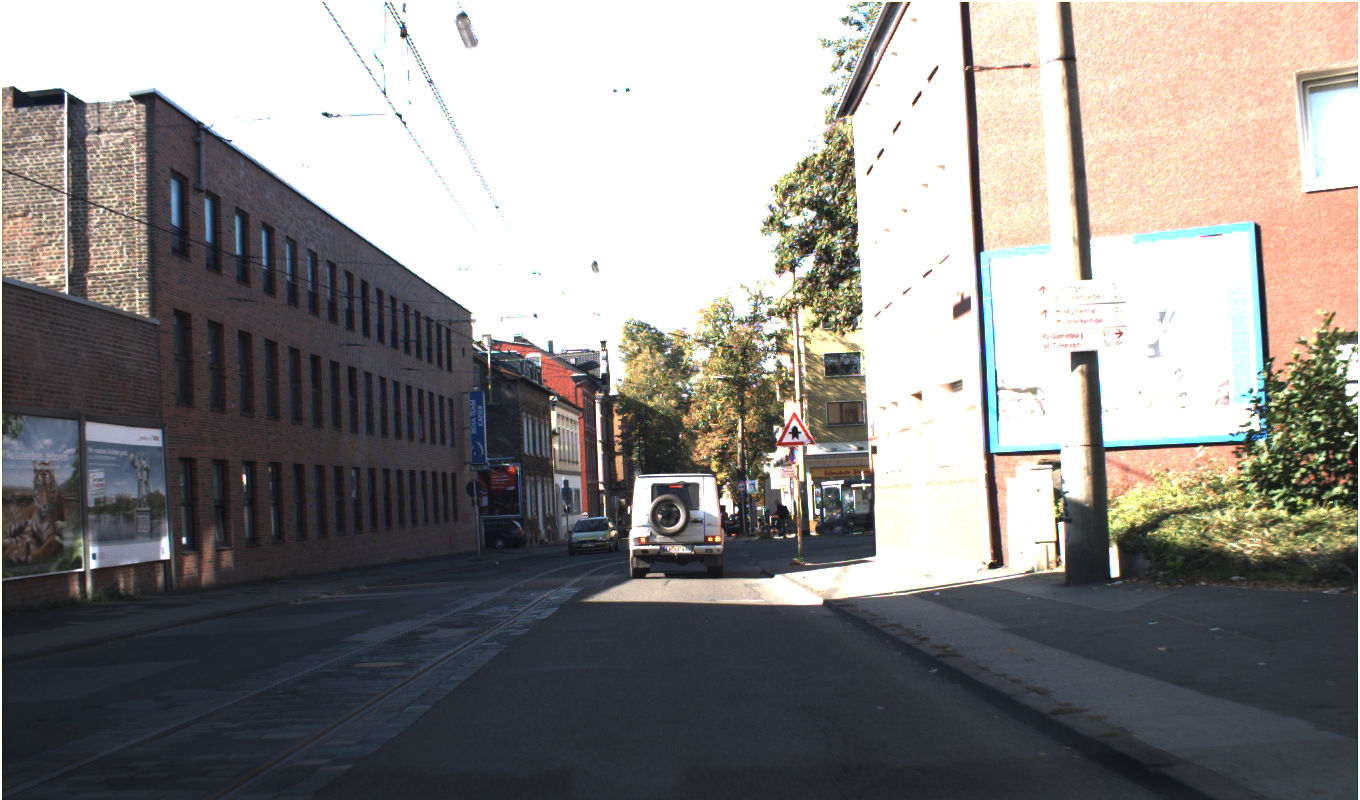

(800, 1360, 3)


In [31]:
img = Image.open(train_path+"/train_data/"+data['path'][0])
img.show()
img=np.array(img)
print(img.shape)

# .ppm to jpg


In [32]:
import cv2 as cv

In [56]:
path_dir="/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data/"
final_df=pd.DataFrame(columns=data.columns)
for current_dir, dirs, files in os.walk(path_dir):
  for f in files:
         #Check if a file end with .ppm format or not
        if f.endswith('.ppm'):
            image_name=f[:-4]
            img=cv.imread(path_dir + f)
            
            single_yolo_dat = data.loc[data['path'] == f].copy()
            # and, in this way, initial dataFrame will not be changed
            # Checking if there is no any annotations for current image
            if single_yolo_dat.isnull().values.all():
                # Removing this image from train data
                # print(f)
                os.remove(path_dir + '/' + f)
                
            #Now save the resulted_frame to a folder inside path_dir
            else:
              final_df=final_df.append(single_yolo_dat)
              #Now writng and saving the image from ppm format to jpg format using OpenCV
              save_path = '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data/images' + '/' + image_name + '.jpg'
              cv.imwrite(save_path, img)
final_df = final_df[~final_df.index.duplicated(keep='first')]
final_df.sort_index(inplace=True)

<ipython-input-56-3f6d67b0503a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(single_yolo_dat)
<ipython-input-56-3f6d67b0503a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(single_yolo_dat)
<ipython-input-56-3f6d67b0503a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(single_yolo_dat)
<ipython-input-56-3f6d67b0503a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(single_yolo_dat)
<ipython-input-56-3f6d67b0503a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [ ]:
path_dir="/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data/"
final_df=pd.DataFrame(columns=data.columns)
for current_dir, dirs, files in os.walk(path_dir):
  for f in files:
         #Check if a file end with .ppm format or not
        if f.endswith('.ppm'):
            image_name=f[:-4]
            img=cv.imread(path_dir + f)
            
            single_yolo_dat = data.loc[data['path'] == f].copy()
            # and, in this way, initial dataFrame will not be changed
            # Checking if there is no any annotations for current image
            if single_yolo_dat.isnull().values.all():
                # Removing this image from train data
                # print(f)
                os.remove(path_dir + '/' + f)
                
            #Now save the resulted_frame to a folder inside path_dir
            else:
              final_df=final_df.append(single_yolo_dat)
              #Now writng and saving the image from ppm format to jpg format using OpenCV
              save_path = '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data/images' + '/' + image_name + '.jpg'
              cv.imwrite(save_path, img)
final_df = final_df[~final_df.index.duplicated(keep='first')]
final_df.sort_index(inplace=True)

In [47]:
final_df


,path,left,top,right,bottom,id
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39
...,...,...,...,...,...,...
847,00570.ppm,881,416,914,449,9
848,00571.ppm,1287,361,1308,384,17
849,00575.ppm,403,474,435,506,38
850,00593.ppm,584,510,608,534,38
